In [2]:
import pandas as pd
import json

# Load JSON from file
with open('game_stats.json', 'r') as f:
    data = json.load(f)

# If the JSON is a list of records or can be normalized
df = pd.json_normalize(data)

# Save to CSV
df.to_csv('game_stats.csv', index=False)

### Change json to df and save as csv

In [4]:
game_stats = pd.read_csv("game_stats.csv")
game_stats.head()  # Display the first few rows of the DataFrame

id  status                  scheduled  \
0  882d2a50-0dae-4e3f-aa95-9959907bcb7d  closed  2023-08-26T18:30:00+00:00   
1  30fabb6c-be35-498f-b8a4-5650e9cb7d2c  closed  2023-08-26T19:30:00+00:00   
2  a2ea1069-632e-4ae0-90e6-fef3e72405c0  closed  2023-08-26T21:30:00+00:00   
3  9e521e0a-03fd-41ab-867f-2fe8b8203d58  closed  2023-08-26T23:00:00+00:00   
4  ca5622f8-2d45-4b75-849e-78762085082e  closed  2023-08-26T23:00:00+00:00   

   attendance entry_mode  clock  quarter           coverage  \
0       49000        LDE  00:00        4               full   
1        5566        LDE  00:00        4  extended_boxscore   
2       17982        LDE  00:00        4               full   
3       23867        LDE  00:00        4               full   
4       15356        LDE  00:00        4               full   

               sr_id neutral_site  ... broadcast.satellite  \
0  sr:match:41338381         True  ...                 NaN   
1  sr:match:41340879         True  ...               206.0   
2  sr:match:41341319          NaN  ...                 NaN   
3  sr:match:41338971          NaN  ...               219.0   
4  sr:match:41341251          NaN  ...               206.0   

   statistics.home.punts.totals.longest  \
0                                   NaN   
1                                  40.0   
2                                  62.0   
3                                  60.0   
4                                  54.0   

  statistics.away.punt_returns.totals.longest  \
0                                         NaN   
1                                         0.0   
2                                         5.0   
3                                         9.0   
4                                         0.0   

  statistics.home.int_returns.totals.longest  \
0                                        NaN   
1                                        NaN   
2                                        1.0   
3                                       40.0   
4                                        NaN   

  statistics.away.rushing.totals.longest_touchdown  \
0                                              NaN   
1                                              NaN   
2                                              1.0   
3                                              NaN   
4                                             21.0   

   statistics.away.receiving.totals.longest_touchdown  \
0                                                NaN    
1                                                NaN    
2                                               32.0    
3                                                3.0    
4                                                NaN    

   statistics.away.passing.totals.longest_touchdown  \
0                                               NaN   
1                                               NaN   
2                                              32.0   
3                                               3.0   
4                                               NaN   

   statistics.away.int_returns.totals.longest  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         0.0   
4                                        55.0   

  statistics.away.int_returns.totals.longest_touchdown  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                               55.0     

  statistics.home.kick_returns.totals.longest_touchdown  
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                       

In [6]:
# Display information about the DataFrame

game_stats.columns

Index(['id', 'status', 'scheduled', 'attendance', 'entry_mode', 'clock',
       'quarter', 'coverage', 'sr_id', 'neutral_site',
       ...
       'broadcast.satellite', 'statistics.home.punts.totals.longest',
       'statistics.away.punt_returns.totals.longest',
       'statistics.home.int_returns.totals.longest',
       'statistics.away.rushing.totals.longest_touchdown',
       'statistics.away.receiving.totals.longest_touchdown',
       'statistics.away.passing.totals.longest_touchdown',
       'statistics.away.int_returns.totals.longest',
       'statistics.away.int_returns.totals.longest_touchdown',
       'statistics.home.kick_returns.totals.longest_touchdown'],
      dtype='object', length=474)

### Get every NCAA fb team and put in a df

In [8]:
teams = pd.read_csv("teams.csv")
pd.set_option('display.max_rows', None)    # Show all rows
pd.set_option('display.max_columns', None) # Show all columns

print (teams)

                                  Team ID         Team Name  \
0    bcacfbac-3ab1-4d80-b852-943fb58d4796             Bears   
1    0d55a067-6556-47ac-b720-fc534c93ffce          Bulldogs   
2    b8828f0f-d7bb-4e7e-a278-854f509838e1         Cavaliers   
3    22739891-4203-4907-9b2c-2a416d007105            Eagles   
4    e82960cb-8abc-4bee-9624-298bbb623941           Indians   
5    f870de05-89cf-48fc-9649-8cfa325f8f66             Lions   
6    88006ae0-74e0-4d9a-a447-7c7bc3275a42          Pioneers   
7    23efdc8b-f31b-4827-bc04-15cdd9edbe78            Saints   
8    5bd3392e-c876-45c3-aa04-3c668d1bec85            Wolves   
9    fe17b7e0-9547-40e4-a5aa-f766c8c320bc           Cowboys   
10   f4a0ba75-0d10-4ef9-95ac-66eaa44e0851            Eagles   
11   775f81ea-0942-458c-8e7a-e24f98800ac3         Grizzlies   
12   542d0895-0f3e-4ef8-a2fa-99cfad478e2b       Hardrockers   
13   3a860a07-ec2b-4237-b6d0-45e018ebd6b7         Mavericks   
14   decc2870-8660-4f2c-8674-fe05ee6b1b7e      Mountain

### Separate the SEC conference from the csv and place in DF

In [10]:
southeastern_teams = []

for index, row in teams.iterrows():
    if row['Conference'] == 'Southeastern':
        southeastern_teams.append(row)

print(southeastern_teams)

[Team ID           d5199a36-7f26-4c3b-be48-9599039e232c
Team Name                                       Aggies
Market                                       Texas A&M
Alias                                             TXAM
Franchise Name                                  Aggies
Conference                                Southeastern
Name: 248, dtype: object, Team ID           2eef738d-c637-4b12-b8df-4b79efcce71e
Team Name                                     Bulldogs
Market                                         Georgia
Alias                                              UGA
Franchise Name                                Bulldogs
Conference                                Southeastern
Name: 249, dtype: object, Team ID           6653b9f3-44c6-4b23-8d15-d32aebdee1f9
Team Name                                     Bulldogs
Market                               Mississippi State
Alias                                             MSST
Franchise Name                                Bulldogs
Conference  

In [12]:
sec_df = pd.DataFrame(southeastern_teams)
sec_df

Team ID     Team Name             Market  \
248  d5199a36-7f26-4c3b-be48-9599039e232c        Aggies          Texas A&M   
249  2eef738d-c637-4b12-b8df-4b79efcce71e      Bulldogs            Georgia   
250  6653b9f3-44c6-4b23-8d15-d32aebdee1f9      Bulldogs  Mississippi State   
251  8177772e-e8b5-44c6-8dc2-a745b863ec3b    Commodores         Vanderbilt   
252  19775492-f1eb-4bc5-9e15-078ebd689c0f  Crimson Tide            Alabama   
253  7b1dbcdb-34b2-479e-9b6b-4c7221e7f743     Gamecocks     South Carolina   
254  c765cbff-99d8-4c43-8f6b-e49577ca18fa        Gators            Florida   
255  ae68bc50-4135-47b5-b2f1-03d0669e54c8     Longhorns              Texas   
256  52dc23de-c6ba-4467-b964-a433658eded2    Razorbacks           Arkansas   
257  e3df6700-2881-4b02-a170-f397bb5718a9        Rebels           Ole Miss   
258  242f21d8-7372-4359-a04f-4d467ead22d6       Sooners           Oklahoma   
259  772536c7-c3e8-40d1-ac6e-232d719dc052        Tigers           Missouri   
260  e5bbd1bd-0d65-4581-8d9c-58b33fd5ce62        Tigers             Auburn   
261  ffca4209-dbfa-4597-b25a-ed19bb351037        Tigers                LSU   
262  9ecb9f6b-df4a-4a92-aaa4-5d50a5286bdd    Volunteers          Tennessee   
263  5941ffa3-cdd5-459b-ab61-fef120b929b2      Wildcats           Kentucky   

    Alias Franchise Name    Conference  
248  TXAM         Aggies  Southeastern  
249   UGA       Bulldogs  Southeastern  
250  MSST       Bulldogs  Southeastern  
251   VAN     Commodores  Southeastern  
252   ALA   Crimson Tide  Southeastern  
253  SCAR      Gamecocks  Southeastern  
254   FLA         Gators  Southeastern  
255   TEX      Longhorns  Southeastern  
256   ARK     Razorbacks  Southeastern  
257  MISS         Rebels  Southeastern  
258  OKLA        Sooners  Southeastern  
259  MIZZ         Tigers  Southeastern  
260   AUB         Tigers  Southeastern  
261   LSU         Tigers  Southeastern  
262  TENN     Volunteers  Southeastern  
263    UK       Wildcats  Southeastern

In [14]:
len(sec_df)

16

## Request the stats for the two selected SEC teams , compile player stats for the season year

### Make API call for the 2022 season data for TA&M(aggies)

In [51]:
#TAM 2022 Stats
# make API call to pull the data

url = "https://api.sportradar.com/ncaafb/trial/v7/en/seasons/2022/REG/teams/d5199a36-7f26-4c3b-be48-9599039e232c/statistics.json"

headers = {
    "accept": "application/json",
    "x-api-key": "NYii5TfXY5KzhPP7RPf2Wj5eMOxiZPqFI1jDuKMB"
}
# make the data into .json form for a cleaner way to review

aggie_22 = requests.get(url, headers=headers).json()
aggie_22


{'id': 'd5199a36-7f26-4c3b-be48-9599039e232c',
 'name': 'Aggies',
 'market': 'Texas A&M',
 'alias': 'TXAM',
 'season': {'id': 'ff53e5e4-10ef-4842-a0b7-b489956fa07e',
  'year': 2022,
  'type': 'REG',
  'name': 'REG'},
 'record': {'games_played': 12,
  'touchdowns': {'pass': 18,
   'rush': 12,
   'total_return': 3,
   'total': 33,
   'fumble_return': 2,
   'int_return': 0,
   'kick_return': 1,
   'punt_return': 0,
   'other': 0},
  'rushing': {'avg_yards': 4.631,
   'attempts': 366,
   'touchdowns': 12,
   'tlost': 37,
   'tlost_yards': -85,
   'yards': 1695,
   'longest': 65,
   'longest_touchdown': 26,
   'redzone_attempts': 58},
  'receiving': {'targets': 390,
   'receptions': 220,
   'avg_yards': 11.968,
   'yards': 2633,
   'touchdowns': 18,
   'yards_after_catch': 2561,
   'longest': 66,
   'longest_touchdown': 66,
   'redzone_targets': 43,
   'air_yards': 72},
  'punts': {'attempts': 62,
   'yards': 2588,
   'net_yards': 2511,
   'blocked': 0,
   'touchbacks': 1,
   'inside_20': 2

### Get roster stats for each member of the team, convert to df and save as a csv

In [53]:
# Flatten player stats
players = aggie_22.get('players', [])

# Option 1: Flatten basic player info + stat categories (rushing, receiving, etc.)
player_rows = []

for p in players:
    row = {
        "id": p.get("id"),
        "name": p.get("name"),
        "position": p.get("position"),
        "jersey": p.get("jersey")
    }

    # Flatten individual stat blocks (e.g., rushing, receiving)
    for stat_type in ['rushing', 'receiving', 'passing', 'defense']:
        if stat_type in p:
            for key, val in p[stat_type].items():
                row[f"{stat_type}_{key}"] = val

    player_rows.append(row)

# Convert to DataFrame
tam22 = pd.DataFrame(player_rows)
print(tam22.head(25))


                                      id                      name position  \
0   00ca3a90-1417-11ed-99ab-175543659a4f            Andrew Maleski       WR   
1   029617b0-850e-11ec-b84d-a909c14fc4b8              Jake Johnson       TE   
2   02c965c7-4ba5-4bfa-92b4-80c2a477dbd1           Kyle Fitzgerald       DB   
3   0426e0ff-e19f-4cfb-a25c-649718f06a4d               Eli Stowers       TE   
4   0742e028-95f1-444b-9acd-4669c7ac7761             Shemar Turner       DE   
5   08809b73-0f83-4aaf-a8b8-93500a99fc60               Owen Jebson       OL   
6   090b25b0-850c-11ec-b446-1b024413db39    Gabriel Brownlow-Dindy       DL   
7   0ac3dea0-1419-11ed-8f55-53b238da45a2          Tyndall McNamara       LB   
8   0cab6307-8ab0-4664-8ec9-28f152b066fb              Jaylon Jones       DB   
9   0fb5bb40-850d-11ec-b446-1b024413db39  Marquis Groves-Killebrew       DB   
10  10501340-1417-11ed-99ab-175543659a4f                Jaxon Rush       WR   
11  14173940-8510-11ec-b84d-a909c14fc4b8            

### Add the team name to each player

In [57]:
tam22["team"] = aggie_22.get("market", "Unknown")

In [63]:
tam22.columns

Index(['id', 'name', 'position', 'jersey', 'receiving_receptions',
       'receiving_targets', 'receiving_yards', 'receiving_avg_yards',
       'receiving_longest', 'receiving_touchdowns',
       'receiving_longest_touchdown', 'receiving_yards_after_catch',
       'receiving_redzone_targets', 'receiving_air_yards',
       'receiving_first_downs', 'defense_tackles', 'defense_assists',
       'defense_combined', 'defense_sacks', 'defense_sack_yards',
       'defense_interceptions', 'defense_passes_defended',
       'defense_forced_fumbles', 'defense_fumble_recoveries',
       'defense_qb_hits', 'defense_tloss', 'defense_tloss_yards',
       'defense_safeties', 'defense_sp_tackles', 'defense_sp_assists',
       'defense_sp_forced_fumbles', 'defense_sp_fumble_recoveries',
       'defense_sp_blocks', 'defense_misc_tackles', 'defense_misc_assists',
       'defense_misc_forced_fumbles', 'defense_misc_fumble_recoveries',
       'rushing_avg_yards', 'rushing_attempts', 'rushing_touchdowns',
   

In [67]:
cols = tam22.columns.tolist()
cols = ['team'] + [col for col in cols if col != 'team']
tam22 = tam22[cols]

In [69]:
tam22.columns

Index(['team', 'id', 'name', 'position', 'jersey', 'receiving_receptions',
       'receiving_targets', 'receiving_yards', 'receiving_avg_yards',
       'receiving_longest', 'receiving_touchdowns',
       'receiving_longest_touchdown', 'receiving_yards_after_catch',
       'receiving_redzone_targets', 'receiving_air_yards',
       'receiving_first_downs', 'defense_tackles', 'defense_assists',
       'defense_combined', 'defense_sacks', 'defense_sack_yards',
       'defense_interceptions', 'defense_passes_defended',
       'defense_forced_fumbles', 'defense_fumble_recoveries',
       'defense_qb_hits', 'defense_tloss', 'defense_tloss_yards',
       'defense_safeties', 'defense_sp_tackles', 'defense_sp_assists',
       'defense_sp_forced_fumbles', 'defense_sp_fumble_recoveries',
       'defense_sp_blocks', 'defense_misc_tackles', 'defense_misc_assists',
       'defense_misc_forced_fumbles', 'defense_misc_fumble_recoveries',
       'rushing_avg_yards', 'rushing_attempts', 'rushing_touchdow

In [ ]:
#aggie_22.drop('')

In [71]:
totals = tam22.get("totals", {})
# convert df to csv for Tableau
tam22.to_csv("TAM2022.csv", index=False)

### Pull Ole Miss 2022 stats and convert to df

In [23]:
#OleMiss 2022 Stats
# make API call to pull the data

url = "https://api.sportradar.com/ncaafb/trial/v7/en/seasons/2022/REG/teams/e3df6700-2881-4b02-a170-f397bb5718a9/statistics.json"

headers = {
    "accept": "application/json",
    "x-api-key": "NYii5TfXY5KzhPP7RPf2Wj5eMOxiZPqFI1jDuKMB"
}
# make the data into .json form for a cleaner way to review

olemiss_stats22 = requests.get(url, headers=headers).json()
olemiss_stats22


{'id': 'e3df6700-2881-4b02-a170-f397bb5718a9',
 'name': 'Rebels',
 'market': 'Ole Miss',
 'alias': 'MISS',
 'season': {'id': 'ff53e5e4-10ef-4842-a0b7-b489956fa07e',
  'year': 2022,
  'type': 'REG',
  'name': 'REG'},
 'record': {'games_played': 13,
  'touchdowns': {'pass': 22,
   'rush': 33,
   'total_return': 1,
   'total': 56,
   'fumble_return': 1,
   'int_return': 0,
   'kick_return': 0,
   'punt_return': 0,
   'other': 0},
  'rushing': {'avg_yards': 5.433,
   'attempts': 614,
   'touchdowns': 33,
   'tlost': 68,
   'tlost_yards': -145,
   'yards': 3336,
   'longest': 61,
   'longest_touchdown': 48,
   'redzone_attempts': 138},
  'receiving': {'targets': 387,
   'receptions': 239,
   'avg_yards': 13.042,
   'yards': 3117,
   'touchdowns': 22,
   'yards_after_catch': 3119,
   'longest': 72,
   'longest_touchdown': 72,
   'redzone_targets': 67,
   'air_yards': -2},
  'punts': {'attempts': 41,
   'yards': 1727,
   'net_yards': 1616,
   'blocked': 0,
   'touchbacks': 2,
   'inside_20': 

In [25]:
# Flatten player stats
players = olemiss_stats22.get('players', [])

# Option 1: Flatten basic player info + stat categories (rushing, receiving, etc.)
player_rows = []

for p in players:
    row = {
        "id": p.get("id"),
        "name": p.get("name"),
        "position": p.get("position"),
        "jersey": p.get("jersey")
    }

    # Flatten individual stat blocks (e.g., rushing, receiving)
    for stat_type in ['rushing', 'receiving', 'passing', 'defense']:
        if stat_type in p:
            for key, val in p[stat_type].items():
                row[f"{stat_type}_{key}"] = val

    player_rows.append(row)

# Convert to DataFrame
om22 = pd.DataFrame(player_rows)
print(om22.head(25))


                                      id                 name position jersey  \
0   006b3cbb-4994-4b69-9795-6a729ee01e83       Demarcus Smith       DT   None   
1   0070ca76-55ed-4725-9271-769e092d5d9f     Ashanti Cistrunk       LB   None   
2   01a26d90-863a-11ec-ac3f-2f01cb0af5e4         Kyirin Heath       TE     85   
3   01c676f4-c6b8-4e5f-9571-44e4bb478c8e        Jonathan Hess       TE     80   
4   01cfe5f0-5f94-4001-bc53-f101425ef70f         Isheem Young      SAF   None   
5   039b5777-1e07-45c7-9705-89668d859fb2        Amani Johnson       DT     45   
6   092d193d-8f4c-41c5-9e14-1475427dd64b          Jaxson Dart       QB   None   
7   09f28247-acf3-4652-a775-1804fa4989a0  Brandon Buckhaulter       WR      9   
8   0a447c03-d71e-4076-90f6-dbce00b50a33           Jared Ivey       DE   None   
9   0cc63743-d33a-4d1c-bc60-6bb87ae6223a      Tysheem Johnson       DB      0   
10  0dc19510-0772-11ed-9d37-15b02999c0f4             Mac Owen       WR     84   
11  0ea6647d-dd98-44c6-a576-

In [74]:
om22["team"] = olemiss_stats22.get("market", "Unknown")

In [76]:
om22.columns

Index(['id', 'name', 'position', 'jersey', 'defense_tackles',
       'defense_assists', 'defense_combined', 'defense_sacks',
       'defense_sack_yards', 'defense_interceptions',
       'defense_passes_defended', 'defense_forced_fumbles',
       'defense_fumble_recoveries', 'defense_qb_hits', 'defense_tloss',
       'defense_tloss_yards', 'defense_safeties', 'defense_sp_tackles',
       'defense_sp_assists', 'defense_sp_forced_fumbles',
       'defense_sp_fumble_recoveries', 'defense_sp_blocks',
       'defense_misc_tackles', 'defense_misc_assists',
       'defense_misc_forced_fumbles', 'defense_misc_fumble_recoveries',
       'rushing_avg_yards', 'rushing_attempts', 'rushing_touchdowns',
       'rushing_yards', 'rushing_longest', 'rushing_longest_touchdown',
       'rushing_redzone_attempts', 'rushing_tlost', 'rushing_tlost_yards',
       'rushing_first_downs', 'passing_attempts', 'passing_completions',
       'passing_cmp_pct', 'passing_yards', 'passing_avg_yards',
       'passing_sa

### Move teams column to primary position

In [78]:
cols = om22.columns.tolist()
cols = ['team'] + [col for col in cols if col != 'team']
om22 = om22[cols]

In [80]:
totals = olemiss_stats22.get("totals", {})
# convert df to csv for Tableau
om22.to_csv("om_22.csv", index=False)

### Pull 2024 data for aggies 

In [111]:
import requests

url = "https://api.sportradar.com/ncaafb/trial/v7/en/seasons/2024/REG/teams/d5199a36-7f26-4c3b-be48-9599039e232c/statistics.json"

headers = {
    "accept": "application/json",
    "x-api-key": "NYii5TfXY5KzhPP7RPf2Wj5eMOxiZPqFI1jDuKMB"
}
#aggiesnotolemiss
aggie24 = requests.get(url, headers=headers).json()
aggie24


{'id': 'd5199a36-7f26-4c3b-be48-9599039e232c',
 'name': 'Aggies',
 'market': 'Texas A&M',
 'alias': 'TXAM',
 'season': {'id': '908fbc20-f5c7-11ee-a306-c311afc28263',
  'year': 2024,
  'type': 'REG',
  'name': 'REG'},
 'record': {'games_played': 13,
  'touchdowns': {'pass': 19,
   'rush': 27,
   'total_return': 2,
   'total': 48,
   'fumble_return': 0,
   'int_return': 2,
   'kick_return': 0,
   'punt_return': 0,
   'other': 0},
  'rushing': {'avg_yards': 4.831,
   'attempts': 526,
   'touchdowns': 27,
   'tlost': 29,
   'tlost_yards': -81,
   'yards': 2541,
   'longest': 75,
   'longest_touchdown': 75,
   'redzone_attempts': 91},
  'receiving': {'targets': 359,
   'receptions': 216,
   'avg_yards': 12.657,
   'yards': 2734,
   'touchdowns': 19,
   'yards_after_catch': 2358,
   'longest': 73,
   'longest_touchdown': 73,
   'redzone_targets': 49,
   'air_yards': 376},
  'punts': {'attempts': 47,
   'yards': 2064,
   'net_yards': 1930,
   'blocked': 1,
   'touchbacks': 6,
   'inside_20': 

### Get roster stats for each member of the team, convert to df and save as a csv

In [113]:
# Flatten player stats
players = aggie24.get('players', [])

# Option 1: Flatten basic player info + stat categories (rushing, receiving, etc.)
player_rows = []

for p in players:
    row = {
        "id": p.get("id"),
        "name": p.get("name"),
        "position": p.get("position"),
        "jersey": p.get("jersey")
    }

    # Flatten individual stat blocks (e.g., rushing, receiving)
    for stat_type in ['rushing', 'receiving', 'passing', 'defense']:
        if stat_type in p:
            for key, val in p[stat_type].items():
                row[f"{stat_type}_{key}"] = val

    player_rows.append(row)

# Convert to DataFrame
tam24 = pd.DataFrame(player_rows)
print(tam24.head(25))


                                      id                    name position  \
0   001576c0-139b-11ef-9335-d1cdfba8ea86        Dashawn Fillmore       DB   
1   00ca3a90-1417-11ed-99ab-175543659a4f          Andrew Maleski       WR   
2   00e8ad00-c5c2-11ee-bbc7-a52b27e3c1e2         Izaiah Williams       WR   
3   0149dba0-3f40-4900-8625-d6834bcdc970              Tre Watson       TE   
4   015f9cb0-a275-11ed-8f2b-f3e5e15ec7fb         Daymion Sanford       LB   
5   0742e028-95f1-444b-9acd-4669c7ac7761           Shemar Turner       DE   
6   090b25b0-850c-11ec-b446-1b024413db39  Gabriel Brownlow-Dindy       DL   
7   0940fee0-58c9-11ef-a260-5771b46d1c81          Charlie Shears       DL   
8   097cb2ed-c95b-42fd-a056-8c83a40973e9       Ar'maj Reed-Adams       OL   
9   09e36060-f893-11ec-8190-074ed0b20d38          Preston Landis       RB   
10  0a553a00-c5c9-11ee-bbc7-a52b27e3c1e2            Terry Bussey       WR   
11  0a60d230-37c0-11ee-8aad-e574e8ef7217       Ronnie Crosby III       RB   

In [115]:
tam24["team"] = aggie24.get("market", "Unknown")

In [117]:
tam24.columns

Index(['id', 'name', 'position', 'jersey', 'receiving_receptions',
       'receiving_targets', 'receiving_yards', 'receiving_avg_yards',
       'receiving_longest', 'receiving_touchdowns',
       'receiving_longest_touchdown', 'receiving_yards_after_catch',
       'receiving_redzone_targets', 'receiving_air_yards',
       'receiving_first_downs', 'defense_tackles', 'defense_assists',
       'defense_combined', 'defense_sacks', 'defense_sack_yards',
       'defense_interceptions', 'defense_passes_defended',
       'defense_forced_fumbles', 'defense_fumble_recoveries',
       'defense_qb_hits', 'defense_tloss', 'defense_tloss_yards',
       'defense_safeties', 'defense_sp_tackles', 'defense_sp_assists',
       'defense_sp_forced_fumbles', 'defense_sp_fumble_recoveries',
       'defense_sp_blocks', 'defense_misc_tackles', 'defense_misc_assists',
       'defense_misc_forced_fumbles', 'defense_misc_fumble_recoveries',
       'defense_sp_own_fumble_recoveries', 'defense_sp_opp_fumble_recover

In [119]:
cols = tam24.columns.tolist()
cols = ['team'] + [col for col in cols if col != 'team']
tam24 = tam24[cols]

In [121]:
tam24

team                                    id                    name  \
0    Texas A&M  001576c0-139b-11ef-9335-d1cdfba8ea86        Dashawn Fillmore   
1    Texas A&M  00ca3a90-1417-11ed-99ab-175543659a4f          Andrew Maleski   
2    Texas A&M  00e8ad00-c5c2-11ee-bbc7-a52b27e3c1e2         Izaiah Williams   
3    Texas A&M  0149dba0-3f40-4900-8625-d6834bcdc970              Tre Watson   
4    Texas A&M  015f9cb0-a275-11ed-8f2b-f3e5e15ec7fb         Daymion Sanford   
5    Texas A&M  0742e028-95f1-444b-9acd-4669c7ac7761           Shemar Turner   
6    Texas A&M  090b25b0-850c-11ec-b446-1b024413db39  Gabriel Brownlow-Dindy   
7    Texas A&M  0940fee0-58c9-11ef-a260-5771b46d1c81          Charlie Shears   
8    Texas A&M  097cb2ed-c95b-42fd-a056-8c83a40973e9       Ar'maj Reed-Adams   
9    Texas A&M  09e36060-f893-11ec-8190-074ed0b20d38          Preston Landis   
10   Texas A&M  0a553a00-c5c9-11ee-bbc7-a52b27e3c1e2            Terry Bussey   
11   Texas A&M  0a60d230-37c0-11ee-8aad-e574e8ef7217       Ronnie Crosby III   
12   Texas A&M  0bfaa4b0-37c3-11ee-8aad-e574e8ef7217            Chase Burton   
13   Texas A&M  0d9850c0-a276-11ed-8f2b-f3e5e15ec7fb           Rylan Kennedy   
14   Texas A&M  15e0bf30-a274-11ed-8f2b-f3e5e15ec7fb          Chase Bisontis   
15   Texas A&M  1b4ced90-58c6-11ef-9b3b-c731cdaeaa58            Dylan Mayers   
16   Texas A&M  1b6db4a0-58c9-11ef-a260-5771b46d1c81     Ashton Bethel-Roman   
17   Texas A&M  1bfa4f20-58c7-11ef-9b3b-c731cdaeaa58          Jackson Graham   
18   Texas A&M  1cc99200-c5c7-11ee-bbc7-a52b27e3c1e2           Isendre Ahfua   
19   Texas A&M  1cfcc810-ffe7-11ed-b351-7582811040e0                BJ Mayes   
20   Texas A&M  1f416e10-8512-11ec-99e6-19cade85298b          Conner Weigman   
21   Texas A&M  20d0f4fe-6b8b-4010-9f36-5a4e123aaf31         Israel Benjamin   
22   Texas A&M  2100cca0-313d-11ed-bfcf-65eaff9f277b         Nathan Figueroa   
23   Texas A&M  28e75f10-58c8-11ef-9b82-af825f74f838             Kyle Garvis   
24   Texas A&M  2a00a31b-02d5-412a-a4c2-00f9787f302c           Truette Tumey   
25   Texas A&M  2d719740-8511-11ec-9a71-73254de4b571          Shemar Stewart   
26   Texas A&M  34621b70-323e-11ee-a1c6-9795b109af6a           Jahdae Walker   
27   Texas A&M  3618ffeb-0200-4d93-a2f4-33fe6fba64bf            Aki Ogunbiyi   
28   Texas A&M  36e0e7e0-58c7-11ef-9b3b-c731cdaeaa58           Carter Braugh   
29   Texas A&M  38a187c0-f030-11ed-8095-ff92e6250fed            Zachary Clay   
30   Texas A&M  3919a460-58c8-11ef-9b82-af825f74f838        Brady Stephenson   
31   Texas A&M  39fef670-a274-11ed-8f2b-f3e5e15ec7fb           Jayvon Thomas   
32   Texas A&M  3a143810-9b61-11ed-9535-f5ca9807efbe        Marcus Ratcliffe   
33   Texas A&M  3f25de20-8510-11ec-b84d-a909c14fc4b8     Theo Melin Ohrstrom   
34   Texas A&M  3f6687d0-c5c4-11ee-bbc7-a52b27e3c1e2         Jordan Lockhart   
35   Texas A&M  411fc440-850e-11ec-b84d-a909c14fc4b8             Jarred Kerr   
36   Texas A&M  43967bb0-37c3-11ee-8aad-e574e8ef7217          Tommy Colligan   
37   Texas A&M  44c68192-dbe0-4e92-aac5-2d936e7815ee          Garrett Miller   
38   Texas A&M  44e11990-37c2-11ee-8aad-e574e8ef7217                Ty Banco   
39   Texas A&M  477bb00d-1633-4049-a0f9-7f67f61c96fd      Moose Muhammad III   
40   Texas A&M  47901750-850c-11ec-b446-1b024413db39            Kam Dewberry   
41   Texas A&M  47fb463b-5d3c-46b5-9adb-e22f5fe551ef           Trey Zuhn III   
42   Texas A&M  49407396-1dd8-4001-b35c-13de2325b245            Drake Bhatia   
43   Texas A&M  49ce21b0-f027-11ed-8095-ff92e6250fed           Isaiah Willis   
44   Texas A&M  4c605480-138e-11ef-8acf-f5eba4332e86             Ryan Burtin   
45   Texas A&M  4cf67650-1416-11ed-99ab-175543659a4f               AJ DiNota   
46   Texas A&M  4e29a389-2f0f-4ce7-b559-596441858df5      Danny Lockhart Jr.   
47   Texas A&M  4ee8e510-1397-11ef-a339-bdbef1d346c2            Jesse Chukwu   
48   Texas A&M  50ca1810-8512-11ec-99e6-19cade85298b              Enai White   
49   Texas

In [125]:
totals = tam24.get("totals", {})
tam24.to_csv("TAM2024.csv", index=False)

### Pull Ole Miss 2024 stats

In [130]:
# OleMiss 2024 Stats

url = "https://api.sportradar.com/ncaafb/trial/v7/en/seasons/2024/REG/teams/e3df6700-2881-4b02-a170-f397bb5718a9/statistics.json"

headers = {
    "accept": "application/json",
    "x-api-key": "NYii5TfXY5KzhPP7RPf2Wj5eMOxiZPqFI1jDuKMB"
}

olemiss_stats24 = requests.get(url, headers=headers).json()
olemiss_stats24


# Flatten player stats
players = olemiss_stats24.get('players', [])

# Option 1: Flatten basic player info + stat categories (rushing, receiving, etc.)
player_rows = []

for p in players:
    row = {
        "id": p.get("id"),
        "name": p.get("name"),
        "position": p.get("position"),
        "jersey": p.get("jersey")
    }

    # Flatten individual stat blocks (e.g., rushing, receiving)
    for stat_type in ['rushing', 'receiving', 'passing', 'defense']:
        if stat_type in p:
            for key, val in p[stat_type].items():
                row[f"{stat_type}_{key}"] = val

    player_rows.append(row)

# Convert to DataFrame
om24 = pd.DataFrame(player_rows)
print(om24.head(25))


                                      id              name position jersey  \
0   06ee8000-eac3-11ee-8a20-978585ed32d7         Cam Clark       DE     35   
1   07fec900-5436-11ef-9fca-813db73cd1c3    Raphael Ekechi       RB   None   
2   092d193d-8f4c-41c5-9e14-1475427dd64b       Jaxson Dart       QB   None   
3   0a447c03-d71e-4076-90f6-dbce00b50a33        Jared Ivey       DE   None   
4   0bd8ac65-7b10-44c6-976a-4d65e097743f        Jack Mills       OL   None   
5   0dc19510-0772-11ed-9d37-15b02999c0f4          Mac Owen       WR     86   
6   0ea6647d-dd98-44c6-a576-70b543fdd143      Jeremy James       OL   None   
7   0f4bafa0-a282-11ed-8817-fbb3e64504d9      Mana Taimani       OL     57   
8   103337c8-81eb-4909-93e7-d21c82279bcf      Carter Short       LS     93   
9   10fe80e5-002d-4d3e-9273-0f4943291263     Julius Buelow       OL   None   
10  11914392-9a50-472c-b945-62b8e6642195         Eli Acker       OL   None   
11  12b00c32-2d1c-4aa3-acdc-539f995f66f7    Joshua Pfeifer      

In [134]:
om24["team"] = olemiss_stats24.get("market", "Unknown")

In [138]:
cols = om24.columns.tolist()
cols = ['team'] + [col for col in cols if col != 'team']
om24 =om24[cols]

In [140]:
om24

team                                    id                      name  \
0    Ole Miss  06ee8000-eac3-11ee-8a20-978585ed32d7                 Cam Clark   
1    Ole Miss  07fec900-5436-11ef-9fca-813db73cd1c3            Raphael Ekechi   
2    Ole Miss  092d193d-8f4c-41c5-9e14-1475427dd64b               Jaxson Dart   
3    Ole Miss  0a447c03-d71e-4076-90f6-dbce00b50a33                Jared Ivey   
4    Ole Miss  0bd8ac65-7b10-44c6-976a-4d65e097743f                Jack Mills   
5    Ole Miss  0dc19510-0772-11ed-9d37-15b02999c0f4                  Mac Owen   
6    Ole Miss  0ea6647d-dd98-44c6-a576-70b543fdd143              Jeremy James   
7    Ole Miss  0f4bafa0-a282-11ed-8817-fbb3e64504d9              Mana Taimani   
8    Ole Miss  103337c8-81eb-4909-93e7-d21c82279bcf              Carter Short   
9    Ole Miss  10fe80e5-002d-4d3e-9273-0f4943291263             Julius Buelow   
10   Ole Miss  11914392-9a50-472c-b945-62b8e6642195                 Eli Acker   
11   Ole Miss  12b00c32-2d1c-4aa3-acdc-539f995f66f7            Joshua Pfeifer   
12   Ole Miss  14173940-8510-11ec-b84d-a909c14fc4b8              Walter Nolen   
13   Ole Miss  152e6030-5437-11ef-9fca-813db73cd1c3                Sean Judge   
14   Ole Miss  1a14ee80-8639-11ec-ac3f-2f01cb0af5e4                  Cam East   
15   Ole Miss  1a3993e0-1d9f-11ed-90b2-abe9c3335e3d            Justin Kowalak   
16   Ole Miss  1ed58a00-24cd-11ed-9b6b-1713a743da6d             Jackson Jones   
17   Ole Miss  23815210-0771-11ed-8445-5760fa4a0c23           Braden Waterman   
18   Ole Miss  251e2128-5c6b-4692-ace4-1689577aff6d                 Trey Amos   
19   Ole Miss  255fce30-a281-11ed-8817-fbb3e64504d9            Brycen Sanders   
20   Ole Miss  26295e55-8cd1-4e4a-bf5a-fb7c580ea1ef              Diego Pounds   
21   Ole Miss  27948000-5438-11ef-903d-13e38929f7be            Elliot Stewart   
22   Ole Miss  287dc7b0-daaa-11ec-b6ef-57dac54685d5              Drew Burnett   
23   Ole Miss  2bc35366-b772-4cde-88ad-1d5a5c80960a          Richard O'Bryant   
24   Ole Miss  2dd7b940-12f3-11ef-944d-73abb01f15b4              Jeffery Rush   
25   Ole Miss  2e452894-d6cf-4d14-bcf0-ca82b9305ae8              Jadon Canady   
26   Ole Miss  306be920-a282-11ed-8817-fbb3e64504d9              Ethan Fields   
27   Ole Miss  31391df0-183a-11ed-a064-ef8b74c0c167          Chris Graves Jr.   
28   Ole Miss  32be7f81-8947-42a2-a5b3-d7abecee9ea3               Akelo Stone   
29   Ole Miss  3b42aaa0-863b-11ec-ac3f-2f01cb0af5e4            Jarell Stinson   
30   Ole Miss  404ce2a9-79d9-496b-a571-78895aa5bf6d             Gerquan Scott   
31   Ole Miss  421d2ffc-9e98-4412-aee1-07479749edb7                 JJ Pegues   
32   Ole Miss  43d31614-b116-4f28-9c6f-579db687816b                Matt Jones   
33   Ole Miss  447335c7-1029-4865-bad3-d16ae950f7b4               Rashad Amos   
34   Ole Miss  46720760-5436-11ef-9fca-813db73cd1c3            Ciaran Pedulla   
35   Ole Miss  46765a31-5af5-4446-9f3c-5e2ba637300e               Devin Price   
36   Ole Miss  481e7db0-16ba-11ee-8c92-9338d1b61ba9               Dylan Davis   
37   Ole Miss  4b5b8910-bb84-11ec-b02b-c5d20f8995ab              Jordan Smart   
38   Ole Miss  4cc524b0-a282-11ed-8817-fbb3e64504d9              Skielar Mann   
39   Ole Miss  4dfb25e9-33d1-44dc-b7ec-89eac3c8322d               Logan Diggs   
40   Ole Miss  4e4e65a0-eacd-11ee-ae70-b9e100f9e2a3               Dillon Hipp   
41   Ole Miss  4ee98f9e-09c6-49e0-965a-ef876fccdd33             Calvin Wilson   
42   Ole Miss  511ddfb0-ef5e-11ed-ba71-41956f3878c1              Torian Kelly   
43   Ole Miss  54787690-5437-11ef-9fca-813db73cd1c3          Trey Nightingale   
44   Ole Miss  5b985710-0772-11ed-9d37-15b02999c0f4             Zach Johansen   
45   Ole Miss  5bb007d0-a280-11ed-8817-fbb3e64504d9         Suntarine Perkins   
46   Ole Miss  5c2b446e-b461-4e57-88be-0b438143ccf1            Reece McIntyre   
47   Ole Miss  5cdcc433-ee82-468b-9124-5acd1d2bf91e       Princely Umanmielen   
48   Ole Miss  5e58499b-1968-4f72-88c0-f

In [142]:
totals = om24.get("totals", {})
om24.to_csv("OM_2024.csv", index=False)

In [ ]:
aggie_stats24.columns

### merge the 2022 seasons together and 2024 together

In [159]:
tam_om22_df = pd.concat([tam22, om22], ignore_index=True)
tam_om22_df

team                                    id  \
0    Texas A&M  00ca3a90-1417-11ed-99ab-175543659a4f   
1    Texas A&M  029617b0-850e-11ec-b84d-a909c14fc4b8   
2    Texas A&M  02c965c7-4ba5-4bfa-92b4-80c2a477dbd1   
3    Texas A&M  0426e0ff-e19f-4cfb-a25c-649718f06a4d   
4    Texas A&M  0742e028-95f1-444b-9acd-4669c7ac7761   
5    Texas A&M  08809b73-0f83-4aaf-a8b8-93500a99fc60   
6    Texas A&M  090b25b0-850c-11ec-b446-1b024413db39   
7    Texas A&M  0ac3dea0-1419-11ed-8f55-53b238da45a2   
8    Texas A&M  0cab6307-8ab0-4664-8ec9-28f152b066fb   
9    Texas A&M  0fb5bb40-850d-11ec-b446-1b024413db39   
10   Texas A&M  10501340-1417-11ed-99ab-175543659a4f   
11   Texas A&M  14173940-8510-11ec-b84d-a909c14fc4b8   
12   Texas A&M  1442457b-cad3-4332-ade1-6fa47f1f6de4   
13   Texas A&M  14c0064e-8069-4a2d-bdaa-b820d2dc75d2   
14   Texas A&M  17d101a5-059e-4b18-9ceb-ae2ef3eff4b2   
15   Texas A&M  19e79cdd-c772-4b21-b4b4-a42b95eb55af   
16   Texas A&M  1f416e10-8512-11ec-99e6-19cade85298b   
17   Texas A&M  1f839b6b-7abf-4a19-99ac-a0f76acac21c   
18   Texas A&M  2100cca0-313d-11ed-bfcf-65eaff9f277b   
19   Texas A&M  2171c2f0-850f-11ec-b84d-a909c14fc4b8   
20   Texas A&M  27d6fc10-6b61-4eb7-8416-a4de2ac2ff6e   
21   Texas A&M  2d719740-8511-11ec-9a71-73254de4b571   
22   Texas A&M  35d31042-15bc-47d1-8f13-f1afa0703a5a   
23   Texas A&M  3618ffeb-0200-4d93-a2f4-33fe6fba64bf   
24   Texas A&M  38a88eb7-f235-4bca-b8e4-dec3892aa31c   
25   Texas A&M  38f271aa-04ce-4349-b6de-883842654e75   
26   Texas A&M  3928fe55-6218-4931-9a86-6a8dcfecee1e   
27   Texas A&M  39b04fae-f23b-4c7e-b231-af6c193f4274   
28   Texas A&M  3a49b3c0-1419-11ed-8f55-53b238da45a2   
29   Texas A&M  3f25de20-8510-11ec-b84d-a909c14fc4b8   
30   Texas A&M  411fc440-850e-11ec-b84d-a909c14fc4b8   
31   Texas A&M  4316c8fc-8d38-4723-9886-3d91f4c38ce6   
32   Texas A&M  44189114-5344-4e49-8f77-d0453a938238   
33   Texas A&M  465e5f76-0028-4f38-8550-e20932f0ea81   
34   Texas A&M  46765a31-5af5-4446-9f3c-5e2ba637300e   
35   Texas A&M  477bb00d-1633-4049-a0f9-7f67f61c96fd   
36   Texas A&M  47901750-850c-11ec-b446-1b024413db39   
37   Texas A&M  47fb463b-5d3c-46b5-9adb-e22f5fe551ef   
38   Texas A&M  49407396-1dd8-4001-b35c-13de2325b245   
39   Texas A&M  4996db20-1417-11ed-99ab-175543659a4f   
40   Texas A&M  49db4956-c0cf-419c-8f47-36de81d33de1   
41   Texas A&M  4cd3d9e6-b9eb-4b4b-9715-a36c71a21861   
42   Texas A&M  4cf67650-1416-11ed-99ab-175543659a4f   
43   Texas A&M  509d1350-141a-11ed-8f55-53b238da45a2   
44   Texas A&M  50ca1810-8512-11ec-99e6-19cade85298b   
45   Texas A&M  54ebfedb-7d04-4380-868f-1e1f5418f578   
46   Texas A&M  55b7f130-850d-11ec-b446-1b024413db39   
47   Texas A&M  55bb3770-850b-11ec-b446-1b024413db39   
48   Texas A&M  57691739-401a-4df4-9113-cddd678c8469   
49   Texas A&M  5c193cb0-313c-11ed-bfcf-65eaff9f277b   
50   Texas A&M  5ca36b1c-85e2-48a4-82a0-8ce9beed9526   
51   Texas A&M  63566390-1418-11ed-8f55-53b238da45a2   
52   Texas A&M  65743b3e-f891-4f93-9b9b-3c48b72a4815   
53   Texas A&M  65e33165-7c40-48a4-bfea-253b38e0d763   
54   Texas A&M  66b90f65-a1b9-4cfc-8be8-10cee7955279   
55   Texas A&M  678276fe-d1ad-4b36-8ac5-800d32413441   
56   Texas A&M  69c81600-313d-11ed-bfcf-65eaff9f277b   
57   Texas A&M  6a91a396-1edd-4f87-b9f3-5909d9a9dd84   
58   Texas A&M  6b646cf0-850f-11ec-b84d-a909c14fc4b8   
59   Texas A&M  6e07bd00-850e-11ec-b84d-a909c14fc4b8   
60   Texas A&M  72039260-1830-4282-9d10-c546c0a44c64   
61   Texas A&M  72e40b94-9fde-43f1-8091-26a7f6b8f882   
62   Texas A&M  75dd315a-7adb-4879-aaba-0ae52c66dbc1   
63   Texas A&M  76aa487e-3875-4614-ac81-42f1806368ef   
64   Texas A&M  79eb6a90-141a-11ed-8f55-53b238da45a2   
65   Texas A&M  7a1e5145-a3d7-414f-aea3-36d05e7fa8f9   
66   Texas A&M  7a821fe0-850d-11ec-b446-1b024413db39   
67   Texas A&M  7cd7fbea-d054-45f2-8e43-afb62297048e   
68   Texas A&M  7cec9418-8be1-43c4-8722-1286dd3cebdd   
69   Texas A&M  82f2e951-1a67-45ac-a2e3-3fb4d46314e3   
70   Texas A&M  831e3972-ec54-4495

In [161]:
tam_om24_df = pd.concat([tam24, om24], ignore_index = True)
tam_om24_df

team                                    id  \
0    Texas A&M  001576c0-139b-11ef-9335-d1cdfba8ea86   
1    Texas A&M  00ca3a90-1417-11ed-99ab-175543659a4f   
2    Texas A&M  00e8ad00-c5c2-11ee-bbc7-a52b27e3c1e2   
3    Texas A&M  0149dba0-3f40-4900-8625-d6834bcdc970   
4    Texas A&M  015f9cb0-a275-11ed-8f2b-f3e5e15ec7fb   
5    Texas A&M  0742e028-95f1-444b-9acd-4669c7ac7761   
6    Texas A&M  090b25b0-850c-11ec-b446-1b024413db39   
7    Texas A&M  0940fee0-58c9-11ef-a260-5771b46d1c81   
8    Texas A&M  097cb2ed-c95b-42fd-a056-8c83a40973e9   
9    Texas A&M  09e36060-f893-11ec-8190-074ed0b20d38   
10   Texas A&M  0a553a00-c5c9-11ee-bbc7-a52b27e3c1e2   
11   Texas A&M  0a60d230-37c0-11ee-8aad-e574e8ef7217   
12   Texas A&M  0bfaa4b0-37c3-11ee-8aad-e574e8ef7217   
13   Texas A&M  0d9850c0-a276-11ed-8f2b-f3e5e15ec7fb   
14   Texas A&M  15e0bf30-a274-11ed-8f2b-f3e5e15ec7fb   
15   Texas A&M  1b4ced90-58c6-11ef-9b3b-c731cdaeaa58   
16   Texas A&M  1b6db4a0-58c9-11ef-a260-5771b46d1c81   
17   Texas A&M  1bfa4f20-58c7-11ef-9b3b-c731cdaeaa58   
18   Texas A&M  1cc99200-c5c7-11ee-bbc7-a52b27e3c1e2   
19   Texas A&M  1cfcc810-ffe7-11ed-b351-7582811040e0   
20   Texas A&M  1f416e10-8512-11ec-99e6-19cade85298b   
21   Texas A&M  20d0f4fe-6b8b-4010-9f36-5a4e123aaf31   
22   Texas A&M  2100cca0-313d-11ed-bfcf-65eaff9f277b   
23   Texas A&M  28e75f10-58c8-11ef-9b82-af825f74f838   
24   Texas A&M  2a00a31b-02d5-412a-a4c2-00f9787f302c   
25   Texas A&M  2d719740-8511-11ec-9a71-73254de4b571   
26   Texas A&M  34621b70-323e-11ee-a1c6-9795b109af6a   
27   Texas A&M  3618ffeb-0200-4d93-a2f4-33fe6fba64bf   
28   Texas A&M  36e0e7e0-58c7-11ef-9b3b-c731cdaeaa58   
29   Texas A&M  38a187c0-f030-11ed-8095-ff92e6250fed   
30   Texas A&M  3919a460-58c8-11ef-9b82-af825f74f838   
31   Texas A&M  39fef670-a274-11ed-8f2b-f3e5e15ec7fb   
32   Texas A&M  3a143810-9b61-11ed-9535-f5ca9807efbe   
33   Texas A&M  3f25de20-8510-11ec-b84d-a909c14fc4b8   
34   Texas A&M  3f6687d0-c5c4-11ee-bbc7-a52b27e3c1e2   
35   Texas A&M  411fc440-850e-11ec-b84d-a909c14fc4b8   
36   Texas A&M  43967bb0-37c3-11ee-8aad-e574e8ef7217   
37   Texas A&M  44c68192-dbe0-4e92-aac5-2d936e7815ee   
38   Texas A&M  44e11990-37c2-11ee-8aad-e574e8ef7217   
39   Texas A&M  477bb00d-1633-4049-a0f9-7f67f61c96fd   
40   Texas A&M  47901750-850c-11ec-b446-1b024413db39   
41   Texas A&M  47fb463b-5d3c-46b5-9adb-e22f5fe551ef   
42   Texas A&M  49407396-1dd8-4001-b35c-13de2325b245   
43   Texas A&M  49ce21b0-f027-11ed-8095-ff92e6250fed   
44   Texas A&M  4c605480-138e-11ef-8acf-f5eba4332e86   
45   Texas A&M  4cf67650-1416-11ed-99ab-175543659a4f   
46   Texas A&M  4e29a389-2f0f-4ce7-b559-596441858df5   
47   Texas A&M  4ee8e510-1397-11ef-a339-bdbef1d346c2   
48   Texas A&M  50ca1810-8512-11ec-99e6-19cade85298b   
49   Texas A&M  55bb3770-850b-11ec-b446-1b024413db39   
50   Texas A&M  58adcfe0-a276-11ed-8f2b-f3e5e15ec7fb   
51   Texas A&M  5935ba00-a275-11ed-8f2b-f3e5e15ec7fb   
52   Texas A&M  5b175e40-9516-11ec-a8cc-21afd89fadd3   
53   Texas A&M  5c193cb0-313c-11ed-bfcf-65eaff9f277b   
54   Texas A&M  5db914b0-a274-11ed-8f2b-f3e5e15ec7fb   
55   Texas A&M  5e0afa40-1394-11ef-9d30-6d94649680b1   
56   Texas A&M  64c1f5f0-9cda-11ed-8450-073f5137ec67   
57   Texas A&M  65743b3e-f891-4f93-9b9b-3c48b72a4815   
58   Texas A&M  65821ed0-58c6-11ef-9b3b-c731cdaeaa58   
59   Texas A&M  66b90f65-a1b9-4cfc-8be8-10cee7955279   
60   Texas A&M  6ff480a0-c7d0-447f-b298-d610b9074b6e   
61   Texas A&M  70713a20-c5c2-11ee-bbc7-a52b27e3c1e2   
62   Texas A&M  72d7dbe0-8f44-11ec-9f33-1965c9c46e44   
63   Texas A&M  7301c4f4-aad2-4c79-885e-008061c23c09   
64   Texas A&M  74eae240-f025-11ed-8095-ff92e6250fed   
65   Texas A&M  764bd8a3-d7fc-4591-9e47-0b2cd3bd7e4f   
66   Texas A&M  7665caf0-1387-11ef-a453-276e817b80af   
67   Texas A&M  79779a00-c5c3-11ee-bbc7-a52b27e3c1e2   
68   Texas A&M  7a1e5145-a3d7-414f-aea3-36d05e7fa8f9   
69   Texas A&M  7f1c9f10-c5c7-11ee-bbc7-a52b27e3c1e2   
70   Texas A&M  7f77c7e0-58c6-11ef

In [165]:
import matplotlib.pyplot as plt

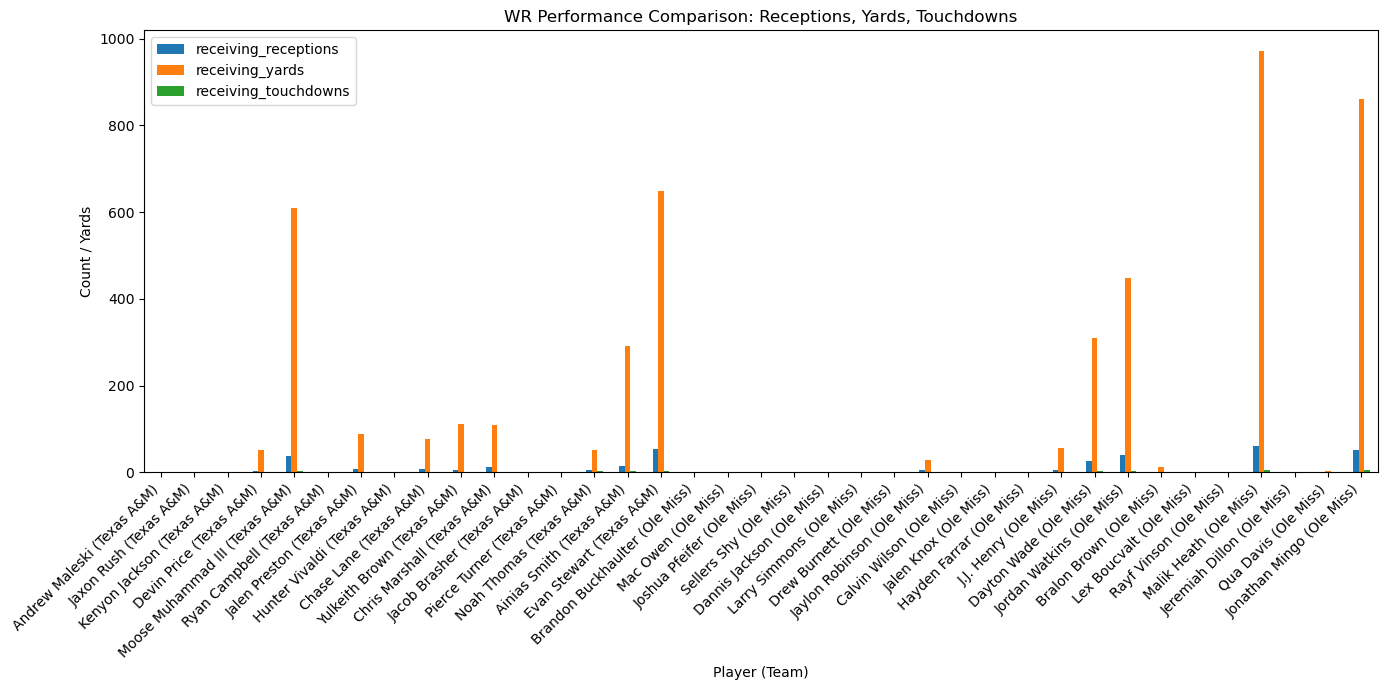

In [169]:
# Filter the merged dataframe for Wide Receivers (WR)
wr_df = tam_om22_df[tam_om22_df['position'] == 'WR']

# Select relevant columns for comparison
# We'll choose receiving stats that are most commonly recorded
wr_stats = wr_df[['name', 'team', 'receiving_receptions', 'receiving_yards', 'receiving_touchdowns']].copy()

# Fill NaN with 0 for plotting
wr_stats.fillna(0, inplace=True)

# Set player names (with team) as index for clarity in the chart
wr_stats['label'] = wr_stats['name'] + ' (' + wr_stats['team'] + ')'
wr_stats.set_index('label', inplace=True)

# Plot grouped bar chart
wr_stats[['receiving_receptions', 'receiving_yards', 'receiving_touchdowns']].plot(
    kind='bar', figsize=(14, 7)
)
plt.title('WR Performance Comparison 2022: Receptions, Yards, Touchdowns')
plt.ylabel('Count / Yards')
plt.xlabel('Player (Team)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


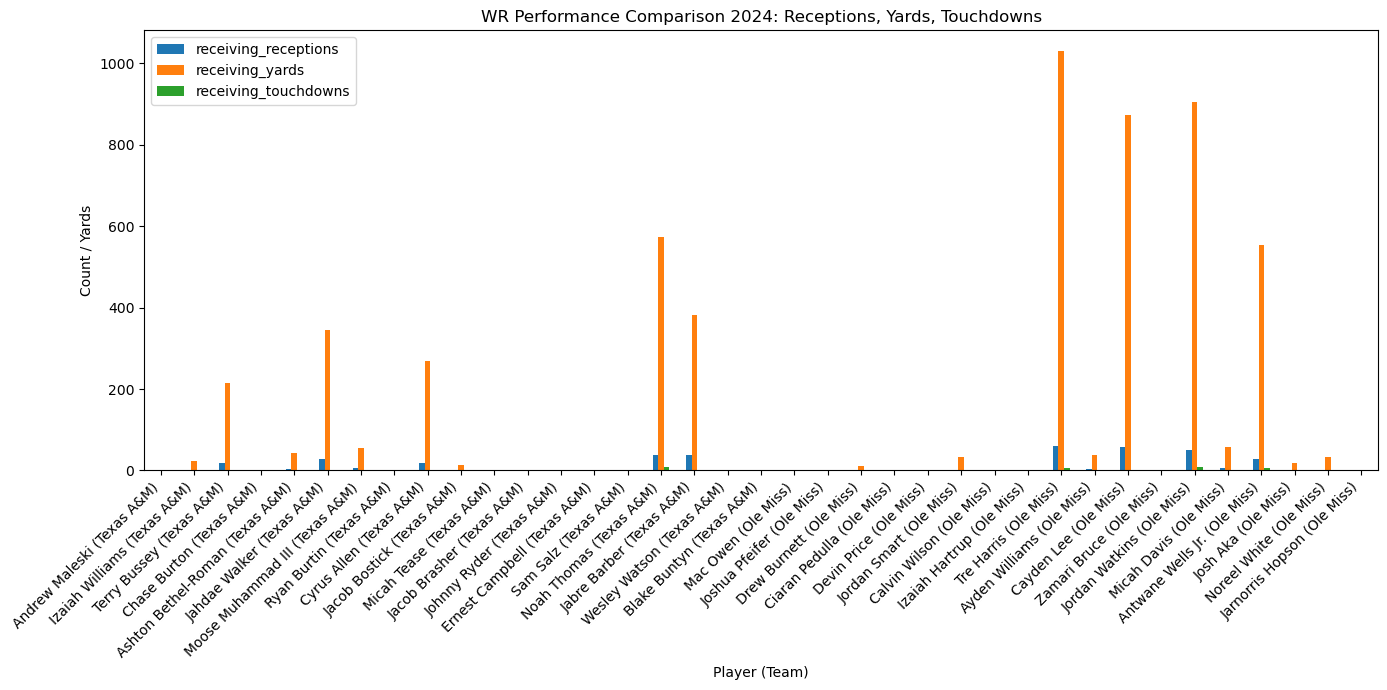

In [173]:
# Filter the merged dataframe for Wide Receivers (WR)
wr_df24 = tam_om24_df[tam_om24_df['position'] == 'WR']

# Select relevant columns for comparison
# We'll choose receiving stats that are most commonly recorded
wr_stats24 = wr_df24[['name', 'team', 'receiving_receptions', 'receiving_yards', 'receiving_touchdowns']].copy()

# Fill NaN with 0 for plotting
wr_stats24.fillna(0, inplace=True)

# Set player names (with team) as index for clarity in the chart
wr_stats24['label'] = wr_stats24['name'] + ' (' + wr_stats24['team'] + ')'
wr_stats24.set_index('label', inplace=True)

# Plot grouped bar chart
wr_stats24[['receiving_receptions', 'receiving_yards', 'receiving_touchdowns']].plot(
    kind='bar', figsize=(14, 7)
)
plt.title('WR Performance Comparison 2024: Receptions, Yards, Touchdowns')
plt.ylabel('Count / Yards')
plt.xlabel('Player (Team)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
